In [1]:
from LRL import *

In [2]:
env = gym.make('MountainCar-v0')

In [3]:
class MountainCarNN(nn.Module):
    def __init__(self, linear):
        super().__init__()
        
        self.layers = nn.Sequential(
                        linear(2, 40),
                        nn.ReLU(),
                        linear(40, 40),
                        nn.ReLU())
        
    def forward(self, x):
        return self.layers(x)

In [4]:
class InverseModelNetwork(InverseModelHead):
    def __init__(self, config, name):
        super().__init__(config, name)

        self.layers = nn.Sequential(
                        self.linear(4, 40),
                        nn.ReLU(),
                        self.linear(40, 40),
                        nn.ReLU(),
                        self.linear(40, 3))

    def forward(self, state, next_state):
        return self.layers(torch.cat([state, next_state], dim=1))

In [5]:
config = {
    "env": env,
    "Qnetwork_FeatureExtractor": MountainCarNN,
    "QnetworkHead": Qnetwork,
    "target_update": 100,
    "batch_size": 32,
    "gamma": 0.99,
    "replay_buffer_init": 128,
    "replay_buffer_capacity": 100000,
    "epsilon_start": 1, "epsilon_final": 0.01, "epsilon_decay": 2000,
    "InverseModel_FeatureExtractor": MountainCarNN,
    "InverseModelHead": InverseModelNetwork,
    "InverseModel_optimizer_args": {"lr": 0.001}
}

In [6]:
agent = eGreedy(TargetQAgent(QAgent(InverseModel(ReplayBufferAgent))))(config)

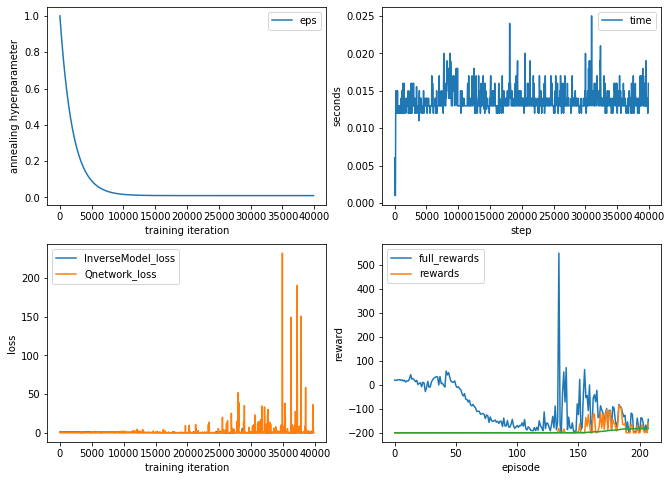

In [10]:
agent.learn(10000)

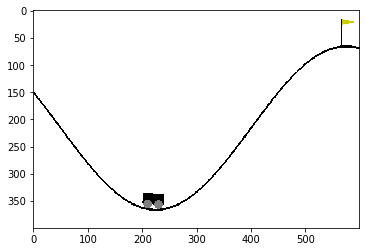

-116.0

In [11]:
agent.play(render=True)

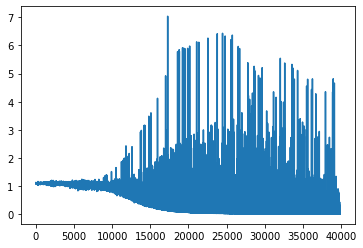

In [12]:
plt.plot(agent.logger["InverseModel_loss"])

In [14]:
agent.save("models/mountainCar_DQN_inverseModel")